<a href="https://colab.research.google.com/github/chavgova/My-AI/blob/master/emotion_recognition_19_female_198values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Voice Emotion Recognition**





In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import model_from_json
from matplotlib.pyplot import specgram
from matplotlib.axis import Axis
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
import os
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from array import *
import re
from sklearn.preprocessing import MinMaxScaler
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pickle

In [ ]:
dataset_path = '/content/drive/My Drive/My_AI/RawData'  # https://drive.google.com/drive/folders/19vC20XHt-_yhsobePchy7K3PcBHD1oCu?usp=sharing
model_path = '/content/drive/MyDrive/My_AI/Experiments/'      #'/content/drive/My Drive/My_AI/MY MODELS/'

model_name = 'EmotionRecognition_CNN_model_19_FEMALE_198values'
gender = 'female'  # female/male
feature_num_values = 198

# LABLES & FEATURES

In [ ]:
dataset_files_list = [] 
dataset_files_list = os.listdir(dataset_path)

print(len(dataset_files_list))

7198


In [ ]:
emo_labels_list=[] 
dataset = ''
count = 0
for item in dataset_files_list:
    file_label = item[6:-16]
    try:
      file_label = int(file_label)
      dataset = 'RAVDESS'
    except:
      if (item[:1] == 'Y') or (item[:1] == 'O'):
        file_label = re.split('_|\.', item)[2]
        dataset = 'TESS'
      else: 
        try:
          item = item[:-4]
          int(item[-3:])  
          dataset = 'SER_v4'
        except:
          dataset = 'SAVEE'

    if dataset == 'RAVDESS':
      if int(item[18:-4])%2==0:  #female
          if file_label == 1:
            emo_labels_list.append('female_neutral')
          elif file_label == 2:
            emo_labels_list.append('female_calm')
          elif file_label == 3:
            emo_labels_list.append('female_joy')
          elif file_label == 4:
            emo_labels_list.append('female_sadness')
          elif file_label == 5:
            emo_labels_list.append('female_anger')
          elif file_label == 6:
            emo_labels_list.append('female_fear')
          elif file_label == 7:
            emo_labels_list.append('female_disgust')
          elif file_label == 8:
            emo_labels_list.append('female_surprise')
      else:
          if file_label== 1:
            emo_labels_list.append('male_neutral')
          elif file_label == 2:
            emo_labels_list.append('male_calm')
          elif file_label == 3:
            emo_labels_list.append('male_joy')
          elif file_label == 4:
            emo_labels_list.append('male_sadness')
          elif file_label == 5:
            emo_labels_list.append('male_anger')
          elif file_label == 6:
            emo_labels_list.append('male_fear')
          elif file_label == 7:
            emo_labels_list.append('male_disgust')
          elif file_label == 8:
            emo_labels_list.append('male_surprise')

    elif dataset == 'TESS':
      if file_label == 'neutral': emo_labels_list.append('female_neutral')
      elif file_label == 'angry': emo_labels_list.append('female_anger')
      elif file_label == 'disgust': emo_labels_list.append('female_disgust')
      elif file_label == 'ps': emo_labels_list.append('female_surprise')
      elif file_label == 'happy': emo_labels_list.append('female_joy')
      elif file_label == 'sad': emo_labels_list.append('female_sadness')
      elif file_label == 'fear': emo_labels_list.append('female_fear')

    elif dataset == 'SER_v4':
      if int(item[-3:])%2 == 1: 
        file_label = item[:-3]
        if file_label == 'neutral': emo_labels_list.append('male_neutral')
        elif file_label == 'anger': emo_labels_list.append('male_anger')
        elif file_label == 'disgust': emo_labels_list.append('male_disgust')
        elif file_label == 'surprise': emo_labels_list.append('male_surprise')
        elif file_label == 'happy': emo_labels_list.append('male_joy')
        elif file_label == 'sad': emo_labels_list.append('male_sadness')
        elif file_label == 'fear': emo_labels_list.append('male_fear')
      else:
        file_label = item[:-3]
        if file_label == 'neutral': emo_labels_list.append('female_neutral')
        elif file_label == 'anger': emo_labels_list.append('female_anger')
        elif file_label == 'disgust': emo_labels_list.append('female_disgust')
        elif file_label == 'surprise': emo_labels_list.append('female_surprise')
        elif file_label == 'happy': emo_labels_list.append('female_joy')
        elif file_label == 'sad': emo_labels_list.append('female_sadness')
        elif file_label == 'fear': emo_labels_list.append('female_fear')
      
    elif dataset == 'SAVEE':
      if item[:1]=='a':
        emo_labels_list.append('male_anger')
      elif item[:1]=='f':
        emo_labels_list.append('male_fear')
      elif item[:1]=='h':
        emo_labels_list.append('male_joy')
      elif item[:1]=='n':
        emo_labels_list.append('male_neutral')
      elif item[:2]=='sa':
        emo_labels_list.append('male_sadness')
      elif item[:2]=='su':
        emo_labels_list.append('male_surprise')
      elif item[:1]=='d':
        emo_labels_list.append('male_disgust')


In [ ]:
labels = pd.DataFrame(emo_labels_list)
labels   

,0
0,male_sadness
1,male_sadness
2,male_sadness
3,female_sadness
4,male_sadness
...,...
7193,male_fear
7194,male_anger
7195,female_calm
7196,female_sadness


Getting the features of audio files using librosa

In [ ]:
def reshape_feature(arr):   # reshapes to 10 values per feature
  shape_arr = arr.shape[0]
  r = shape_arr%10
  arr = arr[:(len(arr)-r)]
  d = int(shape_arr/10)
  arr = np.mean(arr.reshape(-1, d), axis=1) 
  return arr


def extract_feature(current_file, **kwargs):
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    rolloff = kwargs.get("rolloff")
    centroids = kwargs.get("centroids")
    rms = kwargs.get("rms")

    X, sample_rate = librosa.core.load(current_file)

    if chroma or contrast:
        stft = np.abs(librosa.stft(X))
    result = np.array([])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)# (n=40,t) -> 40 values 
        result = np.hstack((result, mfccs))  
    if rms:    
        rms = np.mean(librosa.feature.rms(X).T,axis=0)
        #rms = reshape_feature(rms)      # (1,t) - > 10 values (avg)
        result = np.hstack((result, rms))        
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate, n_fft=2048).T,axis=0) # (128,t) -> 128 values   
        result = np.hstack((result, mel)) 
    if tonnetz:
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0) # (6,t) -> 6 values     
        result = np.hstack((result, tonnetz))
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, n_chroma = 14, sr=sample_rate).T,axis=0)  # (n=14,t) -> 14 values        
        result = np.hstack((result, chroma))              
    if contrast:
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0) # (7,t) -> 7 values
        result = np.hstack((result, contrast)) 
    if rolloff:    
        rolloff = np.mean(librosa.feature.spectral_rolloff(X+0.01, sr=sample_rate).T,axis=0)
        #rolloff = reshape_feature(rolloff)    # (1,t) - > 10 values (avg)
        result = np.hstack((result, rolloff)) 
    if centroids:    
        centroids = np.mean(librosa.feature.spectral_centroid(X, sr=sample_rate).T,axis=0)
        #centroids = reshape_feature(centroids)  # (1,t) - > 10 values (avg)
        result = np.hstack((result, centroids)) 
    
    return result

f = os.fspath(dataset_path +'/03-01-04-01-01-02-01.wav')
a = extract_feature(f, mel=True, mfcc=True, contrast=True, chroma=True, tonnetz=True, rolloff=True, centroids=True, rms=True)
print(a, a.shape)

feature_num_values = a.shape[0]  # number of values per file

[-6.99317810e+02  6.58663712e+01 -1.46951210e+00  1.69011955e+01
  8.15482140e+00 -1.00982465e-01 -1.89459667e-01 -7.22914505e+00
 -1.06605577e+01 -5.17381477e+00 -2.09203815e+00 -1.67458987e+00
 -2.08805943e+00 -3.12811041e+00 -1.03124666e+00 -5.56464732e-01
 -4.04336357e+00 -2.39049888e+00 -1.94777608e+00  2.26835772e-01
 -6.93613195e+00 -9.52266812e-01 -1.55192292e+00 -4.21310759e+00
 -1.69369662e+00 -1.15882659e+00 -4.19827080e+00 -9.73569512e-01
 -3.63886857e+00 -1.13920569e+00 -1.93999171e+00 -2.16017008e+00
 -2.91590357e+00 -1.95912230e+00 -4.46457291e+00 -5.61301887e-01
 -2.24028277e+00 -2.33845305e+00 -3.73151350e+00 -2.85427785e+00
  2.00246787e-03  7.09872756e-06  2.78045954e-05  2.29080883e-03
  2.13088114e-02  3.06051467e-02  5.24413027e-03  2.68800720e-03
  2.30653509e-02  2.91483924e-02  2.65270434e-02  1.09709827e-02
  6.10868726e-03  6.93712290e-03  5.77578740e-03  3.01466491e-02
  3.65261137e-02  8.48076865e-03  4.48498037e-03  4.72523924e-03
  1.24576623e-02  3.99278

EXTRACT FEATURES FROM THE FILES IN THE DATASETS

In [ ]:
data_frame_features = pd.DataFrame(columns=['all_features'])

for index,y in enumerate(dataset_files_list):
      all_features_ndarray = extract_feature(dataset_path + '/'+ y, mel=True, mfcc=True, contrast=True, chroma=True, tonnetz=True, rolloff=True, centroids=True, rms=True)
      data_frame_features.loc[index] = [all_features_ndarray]
      if index%1000==0: print(index)

print(pd.DataFrame(data_frame_features['all_features']).shape)
        

0


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=892
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=874
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=933
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=932
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=609
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=765
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/

1000


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=867
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=954
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=781
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=883
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=989
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=890
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/

2000


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=607
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=853
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=996
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=993
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=930
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=809
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/

3000


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=660
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=808
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=900
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=549
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=784
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=726
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/

4000


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=469
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=1020
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=510
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=942
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=840
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=824
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core

5000


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=967
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=502
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=582
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=998
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=484
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=1005
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core

6000
7000
(7198, 1)


In [ ]:
data_frame_features = pd.DataFrame(data_frame_features['all_features'].values.tolist())
feature_label_df = pd.concat([data_frame_features,labels], axis=1)
feature_label_df = feature_label_df.rename(index=str, columns={"0": "label"})
feature_label_df  

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,0
0,-677.012634,68.128883,1.226144,13.246097,1.681556,0.729557,-13.641574,-3.576321,-8.595146,-4.046197,4.691763,-6.023820,1.683967,-0.069172,-5.879847,0.592706,-6.601959,-6.193829,0.361195,-2.431681,-6.519171,-0.058899,-5.800941,-3.980718,-2.219832,-0.920633,-2.284002,-1.727077,-1.160240,-1.174290,-2.115417,0.928084,1.233275,5.737881,-0.308996,2.263867,0.248554,6.760578,9.820166,17.682037,...,7.833178e-07,6.732893e-07,0.000001,0.000002,0.000004,0.000010,0.000006,0.000002,7.622586e-07,6.203852e-08,-0.031071,0.067044,-0.106815,0.172541,-0.034085,-0.038833,0.683543,0.563260,0.491308,0.583315,0.633197,0.679227,0.749516,0.582634,0.494202,0.531570,0.512122,0.458497,0.463920,0.566851,23.916075,17.319184,20.345724,18.528481,18.319662,17.714452,30.448045,1075.090027,2476.799378,male_sadness
1,-557.077576,37.731339,-25.690922,2.721265,-8.469222,-16.783411,-11.141709,-16.858932,-20.300446,1.526086,-9.046843,-4.551558,-5.803873,-6.084743,0.324458,-1.555423,-1.621262,13.536663,13.608310,16.614511,16.819149,12.947100,1.430434,4.995464,-5.904416,3.786624,2.862549,2.213109,-3.014830,-2.941496,0.153833,5.607506,1.279607,-2.695713,-3.278016,1.666409,3.034963,-0.849231,3.336941,10.858756,...,4.905612e-05,5.432469e-05,0.000072,0.000082,0.000060,0.000034,0.000027,0.000031,8.494911e-06,7.801931e-07,-0.132802,0.081952,-0.164851,0.065626,-0.084684,-0.019814,0.473162,0.491847,0.444110,0.454247,0.493769,0.492756,0.661281,0.718564,0.530350,0.553521,0.602293,0.517585,0.451096,0.424385,19.880041,22.838296,21.529882,20.549496,20.496978,20.783570,32.063672,2057.497559,2858.309888,male_sadness
2,-651.306763,28.174294,-22.387150,-3.099898,-21.895702,-20.684443,-6.937055,-22.691893,-16.077009,-2.648344,-13.845468,-4.334402,-9.532113,-4.433517,-8.319336,-6.686531,5.342288,12.560371,14.379336,23.704239,15.249805,10.304654,-0.133664,1.355807,-6.263078,1.910011,-2.980607,-1.288093,-8.861574,-4.063428,-4.258261,2.463083,-3.307998,-5.789722,-2.006577,1.961835,-0.318634,0.151109,3.371160,9.975064,...,8.067375e-06,9.921479e-06,0.000011,0.000013,0.000009,0.000011,0.000012,0.000013,3.775485e-06,4.598822e-07,-0.069133,0.057175,-0.157773,0.074429,-0.073090,-0.037418,0.303318,0.329323,0.309499,0.281291,0.325560,0.367705,0.500406,0.605766,0.484343,0.392134,0.408733,0.364195,0.290005,0.278199,16.241609,27.394842,23.728332,21.416993,20.492162,20.763445,30.739935,1790.241144,2428.517564,male_sadness
3,-598.479736,83.876938,-4.367654,17.879763,1.207945,-22.144228,-9.396517,-0.343920,-17.230259,2.128920,-0.053539,-7.968759,-5.630410,0.340968,-4.279300,-0.842008,-4.132873,-3.515869,-1.105263,-3.192063,-7.741529,-2.782670,-8.780764,-1.375007,-4.971820,1.227432,-5.522447,-0.596581,-2.901904,-2.884427,-0.602703,-0.587758,0.122286,2.224288,3.667640,1.273863,-0.666005,2.981426,6.911974,14.680707,...,9.509091e-06,8.587799e-06,0.000011,0.000013,0.000013,0.000011,0.000010,0.000009,2.564745e-06,2.197363e-07,0.021745,0.053772,-0.006184,0.131036,-0.025103,-0.043508,0.606057,0.532198,0.434175,0.455268,0.475820,0.525077,0.628532,0.578828,0.479653,0.514261,0.543563,0.464444,0.399926,0.475848,25.398912,18.158348,19.869336,20.598790,18.313720,20.464000,30.941011,1480.814855,1901.391574,female_sadness
4,-620.545410,63.076149,-4.554054,12.682793,0.132150,1.816087,-10.988462,-12.289517,-18.790218,-3.880212,-2.682088,-8.190949,-5.754832,-9.954273,-0.609016,2.046038,-12.034189,-4.354440,-3.916668,-7.596240,-10.865715,-2.858283,-8.838741,-8.424172,-3.157845,-6.277223,-5.993330,-3.999957,-6.670746,-3.156587,-4.428938,-0.825790,0.930507,-1.368442,-1.244825,0.040529,0.498666,3.362422,8.152221,14.178395,...,8.918388e-06,1.254986e-05,0.000037,0.000033,0.000019,0.000015,0.000009,0.000006,2.727287e-06,2.514515e-07,-0.097210,0.083702,-0.08684

# SAVE DATASET FEATURES AND LABELS 

In [ ]:
with open((model_path + model_name + '_dataFrame.pkl'), 'wb') as f:
  pickle.dump(feature_label_df, f)

# LOAD DATASET FEATURES AND LABELS 

In [ ]:
with open((model_path + model_name + '_dataFrame.pkl'), 'rb') as f:
  data_frame_labels = pickle.load(f)

data_frame_labels

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,0
0,-677.012634,68.128883,1.226144,13.246097,1.681556,0.729557,-13.641574,-3.576321,-8.595146,-4.046197,4.691763,-6.023820,1.683967,-0.069172,-5.879847,0.592706,-6.601959,-6.193829,0.361195,-2.431681,-6.519171,-0.058899,-5.800941,-3.980718,-2.219832,-0.920633,-2.284002,-1.727077,-1.160240,-1.174290,-2.115417,0.928084,1.233275,5.737881,-0.308996,2.263867,0.248554,6.760578,9.820166,17.682037,...,7.833178e-07,6.732893e-07,0.000001,0.000002,0.000004,0.000010,0.000006,0.000002,7.622586e-07,6.203852e-08,-0.031071,0.067044,-0.106815,0.172541,-0.034085,-0.038833,0.683543,0.563260,0.491308,0.583315,0.633197,0.679227,0.749516,0.582634,0.494202,0.531570,0.512122,0.458497,0.463920,0.566851,23.916075,17.319184,20.345724,18.528481,18.319662,17.714452,30.448045,1075.090027,2476.799378,male_sadness
1,-557.077576,37.731339,-25.690922,2.721265,-8.469222,-16.783411,-11.141709,-16.858932,-20.300446,1.526086,-9.046843,-4.551558,-5.803873,-6.084743,0.324458,-1.555423,-1.621262,13.536663,13.608310,16.614511,16.819149,12.947100,1.430434,4.995464,-5.904416,3.786624,2.862549,2.213109,-3.014830,-2.941496,0.153833,5.607506,1.279607,-2.695713,-3.278016,1.666409,3.034963,-0.849231,3.336941,10.858756,...,4.905612e-05,5.432469e-05,0.000072,0.000082,0.000060,0.000034,0.000027,0.000031,8.494911e-06,7.801931e-07,-0.132802,0.081952,-0.164851,0.065626,-0.084684,-0.019814,0.473162,0.491847,0.444110,0.454247,0.493769,0.492756,0.661281,0.718564,0.530350,0.553521,0.602293,0.517585,0.451096,0.424385,19.880041,22.838296,21.529882,20.549496,20.496978,20.783570,32.063672,2057.497559,2858.309888,male_sadness
2,-651.306763,28.174294,-22.387150,-3.099898,-21.895702,-20.684443,-6.937055,-22.691893,-16.077009,-2.648344,-13.845468,-4.334402,-9.532113,-4.433517,-8.319336,-6.686531,5.342288,12.560371,14.379336,23.704239,15.249805,10.304654,-0.133664,1.355807,-6.263078,1.910011,-2.980607,-1.288093,-8.861574,-4.063428,-4.258261,2.463083,-3.307998,-5.789722,-2.006577,1.961835,-0.318634,0.151109,3.371160,9.975064,...,8.067375e-06,9.921479e-06,0.000011,0.000013,0.000009,0.000011,0.000012,0.000013,3.775485e-06,4.598822e-07,-0.069133,0.057175,-0.157773,0.074429,-0.073090,-0.037418,0.303318,0.329323,0.309499,0.281291,0.325560,0.367705,0.500406,0.605766,0.484343,0.392134,0.408733,0.364195,0.290005,0.278199,16.241609,27.394842,23.728332,21.416993,20.492162,20.763445,30.739935,1790.241144,2428.517564,male_sadness
3,-598.479736,83.876938,-4.367654,17.879763,1.207945,-22.144228,-9.396517,-0.343920,-17.230259,2.128920,-0.053539,-7.968759,-5.630410,0.340968,-4.279300,-0.842008,-4.132873,-3.515869,-1.105263,-3.192063,-7.741529,-2.782670,-8.780764,-1.375007,-4.971820,1.227432,-5.522447,-0.596581,-2.901904,-2.884427,-0.602703,-0.587758,0.122286,2.224288,3.667640,1.273863,-0.666005,2.981426,6.911974,14.680707,...,9.509091e-06,8.587799e-06,0.000011,0.000013,0.000013,0.000011,0.000010,0.000009,2.564745e-06,2.197363e-07,0.021745,0.053772,-0.006184,0.131036,-0.025103,-0.043508,0.606057,0.532198,0.434175,0.455268,0.475820,0.525077,0.628532,0.578828,0.479653,0.514261,0.543563,0.464444,0.399926,0.475848,25.398912,18.158348,19.869336,20.598790,18.313720,20.464000,30.941011,1480.814855,1901.391574,female_sadness
4,-620.545410,63.076149,-4.554054,12.682793,0.132150,1.816087,-10.988462,-12.289517,-18.790218,-3.880212,-2.682088,-8.190949,-5.754832,-9.954273,-0.609016,2.046038,-12.034189,-4.354440,-3.916668,-7.596240,-10.865715,-2.858283,-8.838741,-8.424172,-3.157845,-6.277223,-5.993330,-3.999957,-6.670746,-3.156587,-4.428938,-0.825790,0.930507,-1.368442,-1.244825,0.040529,0.498666,3.362422,8.152221,14.178395,...,8.918388e-06,1.254986e-05,0.000037,0.000033,0.000019,0.000015,0.000009,0.000006,2.727287e-06,2.514515e-07,-0.097210,0.083702,-0.08684

In [ ]:
labels_array = feature_label_df.iloc[:,(feature_label_df.shape[1]-1):].to_numpy()
features_array = feature_label_df.iloc[:,:(feature_label_df.shape[1]-1)].to_numpy()
print(labels_array)
print(features_array)
print(labels_array.shape)
print(features_array.shape)

[['male_sadness']
 ['male_sadness']
 ['male_sadness']
 ...
 ['female_calm']
 ['female_sadness']
 ['female_joy']]
[[-6.77012634e+02  6.81288834e+01  1.22614372e+00 ...  3.04480453e+01
   1.07509003e+03  2.47679938e+03]
 [-5.57077576e+02  3.77313385e+01 -2.56909218e+01 ...  3.20636723e+01
   2.05749756e+03  2.85830989e+03]
 [-6.51306763e+02  2.81742935e+01 -2.23871498e+01 ...  3.07399350e+01
   1.79024114e+03  2.42851756e+03]
 ...
 [-7.27802979e+02  4.74886742e+01 -3.98731446e+00 ...  2.99915061e+01
   1.21823478e+03  3.06843075e+03]
 [-7.14319092e+02  4.98782425e+01 -4.65872908e+00 ...  2.94835271e+01
   1.29400195e+03  3.27100646e+03]
 [-6.14432373e+02  6.15238953e+01 -4.08322411e+01 ...  3.07692818e+01
   1.61238655e+03  2.67619086e+03]]
(7198, 1)
(7198, 198)


# **PREPROCESSING - SCALING**




In [ ]:
scaler = MinMaxScaler()
features_array_scaled = scaler.fit_transform(features_array)

pickle.dump(scaler, open(model_name + '_SCALER.sav', 'wb'))

features_array_scaled

array([[0.26356249, 0.4348757 , 0.55319874, ..., 0.28298894, 0.1242452 ,
        0.52343082],
       [0.44744382, 0.25412754, 0.29451434, ..., 0.35876652, 0.28487494,
        0.61838108],
       [0.30297407, 0.19729998, 0.32626499, ..., 0.29667942, 0.24117686,
        0.51141446],
       ...,
       [0.18569205, 0.31214606, 0.5030952 , ..., 0.26157593, 0.14765026,
        0.67067592],
       [0.2063652 , 0.32635478, 0.49664262, ..., 0.23775025, 0.16003866,
        0.72109292],
       [0.35950893, 0.3956015 , 0.14899984, ..., 0.29805587, 0.21209652,
        0.57305533]])

In [ ]:
scaler = pickle.load(open(model_name + '_SCALER.sav', 'rb'))
features_array_scaled = scaler.transform(features_array)
features_array_scaled

array([[0.26356249, 0.4348757 , 0.55319874, ..., 0.28298894, 0.1242452 ,
        0.52343082],
       [0.44744382, 0.25412754, 0.29451434, ..., 0.35876652, 0.28487494,
        0.61838108],
       [0.30297407, 0.19729998, 0.32626499, ..., 0.29667942, 0.24117686,
        0.51141446],
       ...,
       [0.18569205, 0.31214606, 0.5030952 , ..., 0.26157593, 0.14765026,
        0.67067592],
       [0.2063652 , 0.32635478, 0.49664262, ..., 0.23775025, 0.16003866,
        0.72109292],
       [0.35950893, 0.3956015 , 0.14899984, ..., 0.29805587, 0.21209652,
        0.57305533]])

# **SAVE SCALED ARRAY AND LABELS**






In [ ]:
with open((model_path + model_name + '_SCALED_featuresArray.pkl'), 'wb') as f:
  pickle.dump(features_array_scaled, f)

with open((model_path + model_name + '_labelsArray.pkl'), 'wb') as f:
  pickle.dump(labels_array, f)

# LOAD LABELS AND SCALED FEATURES

In [ ]:
with open((model_path + model_name + '_SCALED_featuresArray.pkl'), 'rb') as f:
  features_array_scaled = pickle.load(f)

with open((model_path + model_name + '_labelsArray.pkl'), 'rb') as f:
  labels_array = pickle.load(f)

In [ ]:
def takeMaleData(labels_array, features_array_scaled):
  labels_filtered_array = []
  features_filtered_array =  []

  for index, i in enumerate(labels_array):
    if 'female' not in i[0]:  
      labels_filtered_array.append(labels_array[index])
      features_filtered_array.append(features_array_scaled[index])
  return np.array(labels_filtered_array), np.array(features_filtered_array)

def takeFemaleData(labels_array, features_array_scaled):
  labels_filtered_array = []
  features_filtered_array =  []

  for index, i in enumerate(labels_array):
    if 'female' in i[0]:  
      labels_filtered_array.append(labels_array[index])
      features_filtered_array.append(features_array_scaled[index])
  return np.array(labels_filtered_array), np.array(features_filtered_array)

if gender.lower() == 'female':
  labels_filtered_array, features_filtered_array = takeFemaleData(labels_array, features_array_scaled)  
elif gender.lower() == 'male':
  labels_filtered_array, features_filtered_array = takeMaleData(labels_array, features_array_scaled) 
  
print(labels_filtered_array)
print(labels_filtered_array.shape)

[['female_sadness']
 ['female_sadness']
 ['female_sadness']
 ...
 ['female_calm']
 ['female_sadness']
 ['female_joy']]
(4745, 1)


SAVE LABEL ENCODER CLASSES

In [ ]:
lb = LabelEncoder()
lb.fit(labels_filtered_array)
print(lb.classes_)
with open((model_path + gender + '_classes_emotions.pkl'), 'wb') as f:
  pickle.dump(lb.classes_, f)  

['female_anger' 'female_calm' 'female_disgust' 'female_fear' 'female_joy'
 'female_neutral' 'female_sadness' 'female_surprise']


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LOAD LABEL ENCODER CLASSES

In [ ]:
lb = LabelEncoder()
with open((model_path + gender + '_classes_emotions.pkl'), 'rb') as f:
  lb.classes_ = pickle.load(f)
print(lb.classes_)

['female_anger' 'female_calm' 'female_disgust' 'female_fear' 'female_joy'
 'female_neutral' 'female_sadness' 'female_surprise']


SHUFFLE FILES AND LABELS 

In [ ]:
features_filt_shuff_array, labels_filt_shuff_array = shuffle(features_filtered_array, labels_filtered_array)

print(features_filt_shuff_array)
print()
print(labels_filt_shuff_array)

[[0.58687363 0.14558512 0.45270375 ... 0.20786696 0.45184581 0.67972332]
 [0.53833492 0.24570789 0.39601957 ... 0.28248515 0.35617564 0.64948082]
 [0.75595399 0.36222099 0.45183396 ... 0.34720767 0.69854972 0.6283642 ]
 ...
 [0.74484016 0.4328613  0.67876097 ... 0.38661531 0.62157666 0.59966526]
 [0.8184874  0.32779449 0.40976364 ... 0.30514584 0.78770188 0.6744757 ]
 [0.7930127  0.27993206 0.30795034 ... 0.31681741 0.74119284 0.66635232]]

[['female_fear']
 ['female_joy']
 ['female_surprise']
 ...
 ['female_surprise']
 ['female_surprise']
 ['female_surprise']]



# Dividing the data into test and train

In [ ]:
train_samples_num = round(len(labels_filtered_array)*0.8)

X_train = np.array(features_filt_shuff_array[:train_samples_num]) #train_features_array
y_train = np.array(labels_filt_shuff_array[:train_samples_num]) #train_label_array
X_test = np.array(features_filt_shuff_array[train_samples_num:]) #test_features_array
y_test = np.array(labels_filt_shuff_array[train_samples_num:]) #test_label_array

TRANSFORM LABELS

In [ ]:
y_train = np_utils.to_categorical(lb.transform(y_train))
y_test = np_utils.to_categorical(lb.transform(y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Changing dimension for CNN model

In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)
print(x_testcnn)

[[[0.65293407]
  [0.47002279]
  [0.42077387]
  ...
  [0.24662149]
  [0.44244662]
  [0.49464707]]

 [[0.68245553]
  [0.43143655]
  [0.84187919]
  ...
  [0.28627651]
  [0.55488742]
  [0.53798674]]

 [[0.4623292 ]
  [0.35575664]
  [0.3163509 ]
  ...
  [0.32942356]
  [0.29604986]
  [0.60785361]]

 ...

 [[0.74484016]
  [0.4328613 ]
  [0.67876097]
  ...
  [0.38661531]
  [0.62157666]
  [0.59966526]]

 [[0.8184874 ]
  [0.32779449]
  [0.40976364]
  ...
  [0.30514584]
  [0.78770188]
  [0.6744757 ]]

 [[0.7930127 ]
  [0.27993206]
  [0.30795034]
  ...
  [0.31681741]
  [0.74119284]
  [0.66635232]]]


# **MODEL**

In [ ]:
model = Sequential() 

model.add(Conv1D(feature_num_values, kernel_size=5,padding='same', activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), input_shape=(feature_num_values,1)))

model.add(Conv1D(128, kernel_size=5,padding='same', activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))

model.add(Conv1D(128, kernel_size=5,padding='same', activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5,padding='same', activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))

model.add(Dense(units=64, activation='tanh',input_dim=2,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5,padding='same', activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))

model.add(Flatten())

model.add(Dense(units=32, activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dense(8))
model.add(Activation('softmax')) 

opt = tf.keras.optimizers.Adam(learning_rate=0.0001) 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 198, 198)          1188      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 198, 128)          126848    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 198, 128)          82048     
_________________________________________________________________
dropout (Dropout)            (None, 198, 128)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 198, 64)           41024     
_________________________________________________________________
dense (Dense)                (None, 198, 64)           4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 198, 64)           0

In [ ]:
model.compile(loss= 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

In [ ]:
cnnhistory = model.fit(x_traincnn, y_train, batch_size = 32, epochs = 50, validation_data = (x_testcnn, y_test))

Epoch 1/50
119/119 [==============================] - 41s 328ms/step - loss: 2.0345 - accuracy: 0.3033 - val_loss: 1.3727 - val_accuracy: 0.6280
Epoch 2/50
119/119 [==============================] - 38s 320ms/step - loss: 1.2745 - accuracy: 0.6628 - val_loss: 1.0965 - val_accuracy: 0.7071
Epoch 3/50
119/119 [==============================] - 46s 387ms/step - loss: 1.0552 - accuracy: 0.7206 - val_loss: 1.0202 - val_accuracy: 0.7229
Epoch 4/50
119/119 [==============================] - 39s 326ms/step - loss: 0.9566 - accuracy: 0.7519 - val_loss: 0.9913 - val_accuracy: 0.7345
Epoch 5/50
119/119 [==============================] - 37s 313ms/step - loss: 0.8603 - accuracy: 0.7824 - val_loss: 0.8981 - val_accuracy: 0.7798
Epoch 6/50
119/119 [==============================] - 37s 313ms/step - loss: 0.8187 - accuracy: 0.8078 - val_loss: 0.8964 - val_accuracy: 0.7713
Epoch 7/50
119/119 [==============================] - 37s 313ms/step - loss: 0.7751 - accuracy: 0.8157 - val_loss: 0.8300 - val_ac

# **PLOTTING**

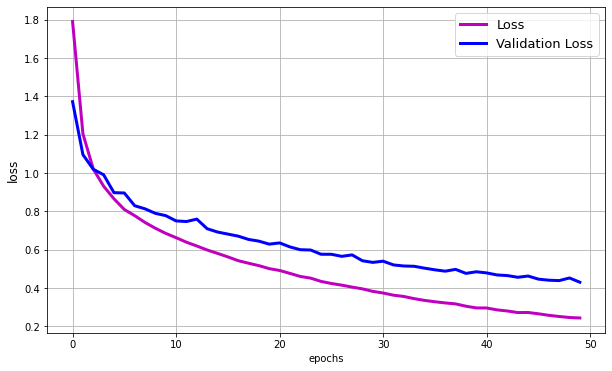

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(cnnhistory.history['loss'], 'm', linewidth=3)
plt.plot(cnnhistory.history['val_loss'], 'b', linewidth=3)
plt.legend(['Loss', 'Validation Loss'], fontsize=13)
plt.xlabel('epochs')
plt.ylabel('loss', fontsize=12)
plt.grid(True)
plt.show()

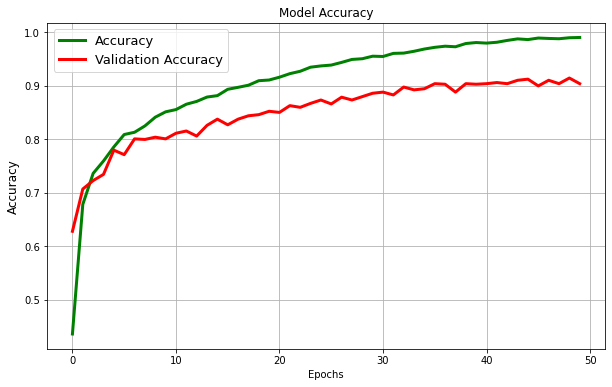

In [ ]:
plt.figure(figsize=(10,6), frameon=True)
plt.plot(cnnhistory.history['accuracy'], 'g', linewidth=3)
plt.plot(cnnhistory.history['val_accuracy'], 'r', linewidth=3)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy', fontsize=12)
plt.legend(['Accuracy', 'Validation Accuracy'], loc = 'upper left', fontsize=13)
plt.grid(True)
plt.show()

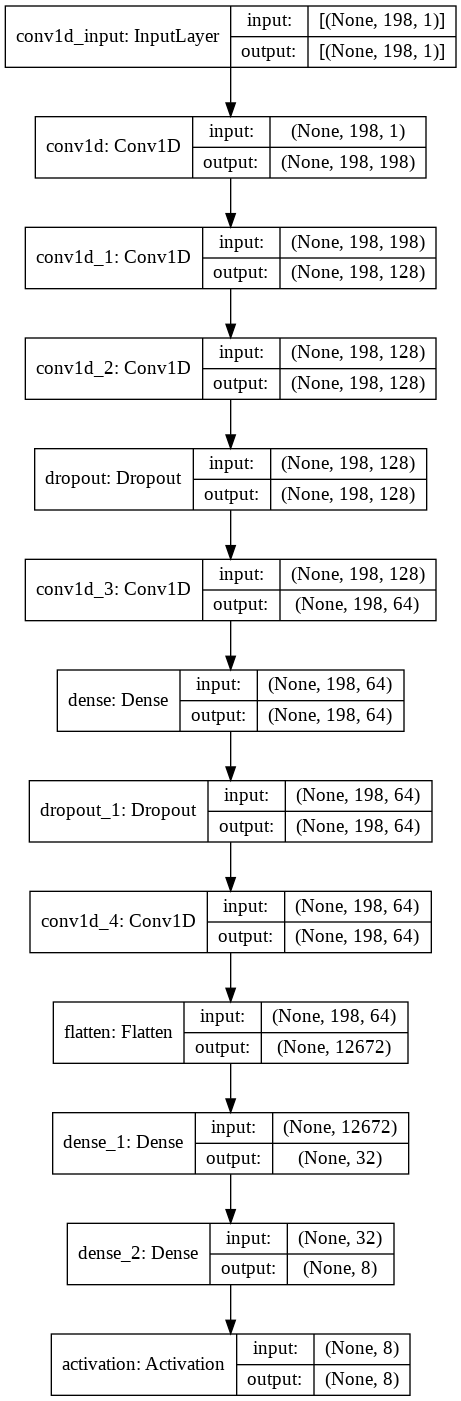

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="img_model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

dot_img_file = (model_path + 'img_cnn_model_' + model_name + '.png')
tf.keras.utils.plot_model(model, to_file = dot_img_file, show_shapes=True)


# **SAVING THE MODEL**

In [ ]:
model.save(os.path.join(model_path, (model_name + '_MODEL.h5')))
print('Saved trained model at %s ' % model_path)

model_json = model.to_json()
with open((model_path + model_name + '_MODEL.json'), "w") as json_file:
    json_file.write(model_json)

Saved trained model at /content/drive/MyDrive/My_AI/Experiments/ 


# **LOADING THE MODEL**

In [ ]:
json_file = open(model_path + model_name + '_MODEL.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(model_path + model_name + '_MODEL.h5')
print("Loaded model from disk")

opt = tf.keras.optimizers.Adam(learning_rate=0.0001) 
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
#score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk


# **Predicting emotions on the test data**


In [ ]:
lb = LabelEncoder()
with open((model_path + gender + '_classes_emotions.pkl'), 'rb') as f:
  lb.classes_ = pickle.load(f)
print(lb.classes_)

predicted = loaded_model.predict(x_testcnn, batch_size=32, verbose=1)
predicted = predicted.argmax(axis=1)
predicted = predicted.astype(int).flatten()

predictions = (lb.inverse_transform((predicted)))
predictions_df = pd.DataFrame({'predictedvalues': predictions})

actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()

actual_labels = (lb.inverse_transform((actual)))

actual_labels = pd.DataFrame({'actualvalues': actual_labels})
actual_pred_df = actual_labels.join(predictions_df)

actual_pred_df[40:50]

['female_anger' 'female_calm' 'female_disgust' 'female_fear' 'female_joy'
 'female_neutral' 'female_sadness' 'female_surprise']
30/30 [==============================] - 2s 76ms/step


,actualvalues,predictedvalues
40,female_joy,female_joy
41,female_sadness,female_sadness
42,female_disgust,female_disgust
43,female_disgust,female_disgust
44,female_sadness,female_sadness
45,female_fear,female_fear
46,female_disgust,female_disgust
47,female_sadness,female_sadness
48,female_disgust,female_surprise
49,female_fear,female_fear


In [ ]:
actual_pred_df.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_anger,141
female_calm,17
female_disgust,117
female_fear,135
female_joy,152
female_neutral,110
female_sadness,148
female_surprise,129


In [ ]:
actual_pred_df.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_anger,141
female_calm,18
female_disgust,112
female_fear,138
female_joy,145
female_neutral,118
female_sadness,144
female_surprise,133


In [ ]:
actual_pred_df.to_csv(model_path + model_name + '_PREDICTIONS' + '.csv', index=False)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

classes = actual_pred_df.actualvalues.unique()
classes.sort()    
print(classification_report(actual_pred_df.actualvalues, actual_pred_df.predictedvalues, target_names=classes))


                 precision    recall  f1-score   support

   female_anger       0.91      0.91      0.91       141
    female_calm       0.56      0.59      0.57        17
 female_disgust       0.96      0.92      0.94       117
    female_fear       0.88      0.90      0.89       135
     female_joy       0.92      0.88      0.90       152
 female_neutral       0.89      0.95      0.92       110
 female_sadness       0.89      0.86      0.88       148
female_surprise       0.92      0.95      0.93       129

       accuracy                           0.90       949
      macro avg       0.87      0.87      0.87       949
   weighted avg       0.91      0.90      0.90       949



0.9041095890410958


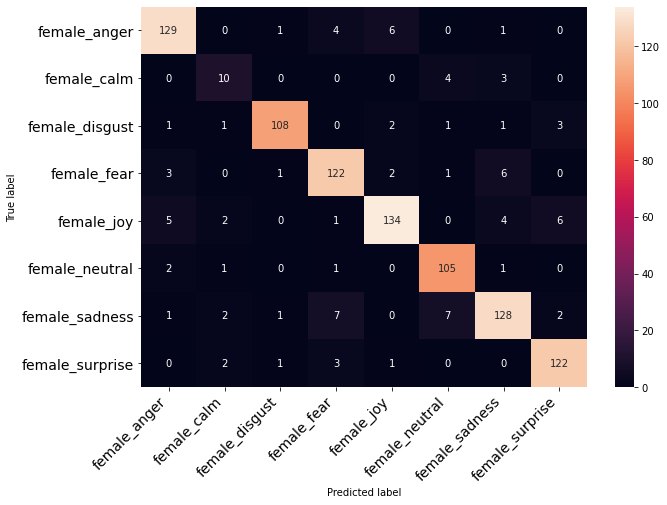

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_joy' or 'female_sadness' or 'female_surprise' or 'female_neutral' or 'female_anger' or 'female_calm':
        return 'female'

actual_pred_df = pd.read_csv(model_path + model_name + '_PREDICTIONS' + '.csv')
classes = actual_pred_df.actualvalues.unique()
classes.sort()    

c = confusion_matrix(actual_pred_df.actualvalues, actual_pred_df.predictedvalues)
print(accuracy_score(actual_pred_df.actualvalues, actual_pred_df.predictedvalues))
print_confusion_matrix(c, class_names = classes)